# Fastai Mnist sample (for binder)
- (adapted from fastai v3 https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson1-pets.ipynb)

In this lesson we will build our first image classifier from scratch. Let's dive in!

Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [41]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [42]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

We are going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data.

In [43]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



We'll use MNIST sample version, with two classes: 3 and 7

In [9]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/home/jovyan/.fastai/data/mnist_sample')

In [50]:
path.ls()

[PosixPath('/home/jovyan/.fastai/data/mnist_sample/models'),
 PosixPath('/home/jovyan/.fastai/data/mnist_sample/train'),
 PosixPath('/home/jovyan/.fastai/data/mnist_sample/valid'),
 PosixPath('/home/jovyan/.fastai/data/mnist_sample/labels.csv')]

## Binder/docker/fastai changes

In [ ]:
#Binder doesn't allow for GPU, switch to CPU
defaults.device = 'cpu'

In [34]:
data = ImageDataBunch.from_folder(path)

In [35]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (12396 items)
[Category 7, Category 7, Category 7, Category 7, Category 7]...
Path: /home/jovyan/.fastai/data/mnist_sample
x: ImageItemList (12396 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: /home/jovyan/.fastai/data/mnist_sample;

Valid: LabelList
y: CategoryList (2038 items)
[Category 7, Category 7, Category 7, Category 7, Category 7]...
Path: /home/jovyan/.fastai/data/mnist_sample
x: ImageItemList (2038 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: /home/jovyan/.fastai/data/mnist_sample;

Test: None

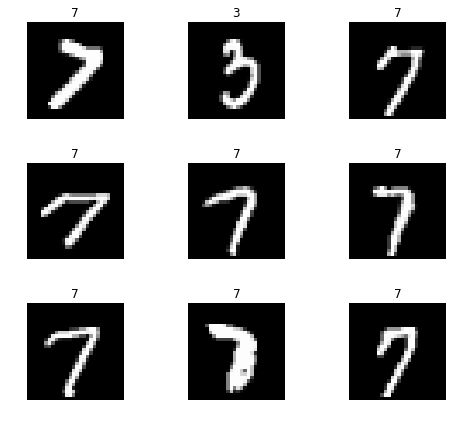

In [36]:
data.show_batch(rows=3, figsize=(7,6))

In [37]:
print(data.classes)
len(data.classes),data.c

['3', '7']


(2, 2)

## Training

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. 

We will train for 2 epochs (2 cycles through all our data).

In [38]:
learn = create_cnn(data, models.resnet18, metrics=[accuracy])

In [39]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [40]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy
1,0.171956,0.097023,0.964181
2,0.098808,0.073960,0.976938


In [44]:
learn.save('stage-1')

## Results

In [45]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

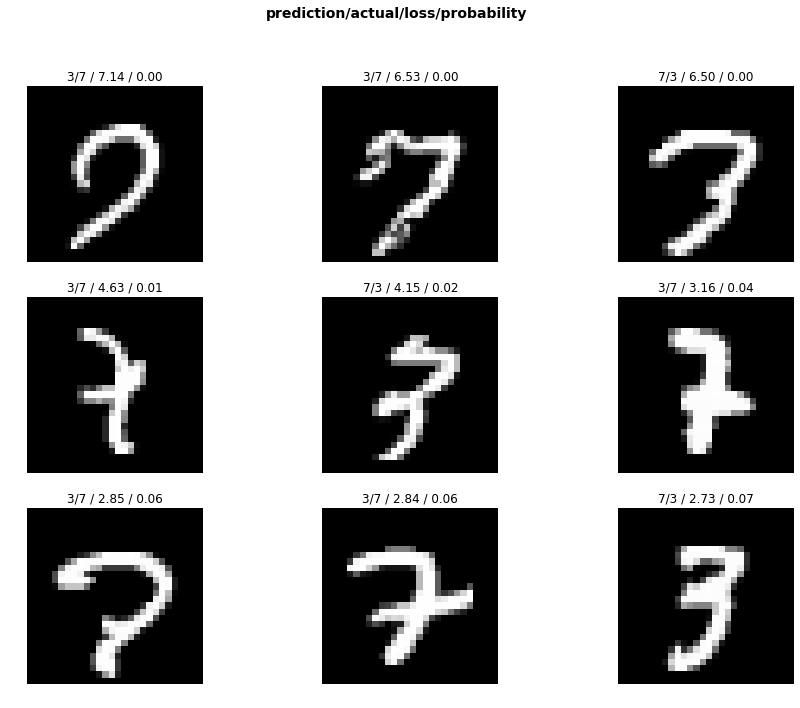

In [46]:
interp.plot_top_losses(9, figsize=(15,11))

In [47]:
doc(interp.plot_top_losses)

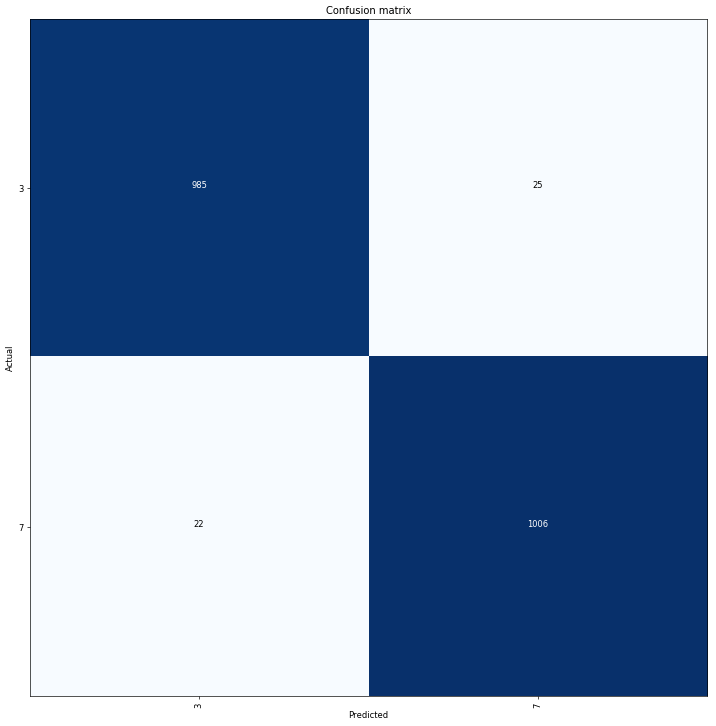

In [48]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [49]:
interp.most_confused(min_val=2)

[('3', '7', 25), ('7', '3', 22)]

## Check fastai v3 course for more videos & tutorials!
- https://course.fast.ai/